In [1]:
import pandas as pd 
import random 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 랜덤하게 각 주식의 가격 100개의 데이터 생성 
# 삼성
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')
samsung_prices = [random.randint(80000,90000) for _ in range(100)]
samsung_data = {'Date' : dates, '005930.KS' : samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)

# LG 
lg_prices = [random.randint(140000,160000) for _ in range(100)]
lg_data = {'Date' : dates, '066570.KS' : lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)

# 두개의 프레임 합치기 
df = pd.concat([samsung_df, lg_df] , axis=1)
df = df.loc[:, ['005930.KS', '066570.KS']]
df.columns = ['Samsung', 'LG']

# 폴더 생성 
os.makedirs("./data", exist_ok=True)

# 저장
df.to_csv("./data/stock_price.csv")

In [3]:
# csv 읽기 
df = pd.read_csv('./data/stock_price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df)

# 두 종목의 수익률 계산 
returns = df.pct_change()
print(returns)

# 수익률 간의 상관 계수 계산 
corr_matrix = returns.corr()
print(corr_matrix)

            Samsung      LG
Date                       
2021-01-04    86319  149354
2021-01-05    85448  151071
2021-01-06    89483  146118
2021-01-07    82008  144075
2021-01-08    80082  143359
...             ...     ...
2021-04-09    80056  156038
2021-04-10    85250  159426
2021-04-11    86528  142507
2021-04-12    81584  159618
2021-04-13    86601  151012

[100 rows x 2 columns]
             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05 -0.010090  0.011496
2021-01-06  0.047222 -0.032786
2021-01-07 -0.083535 -0.013982
2021-01-08 -0.023486 -0.004970
...              ...       ...
2021-04-09 -0.092521  0.046154
2021-04-10  0.064880  0.021713
2021-04-11  0.014991 -0.106124
2021-04-12 -0.057138  0.120071
2021-04-13  0.061495 -0.053916

[100 rows x 2 columns]
          Samsung        LG
Samsung  1.000000 -0.352082
LG      -0.352082  1.000000


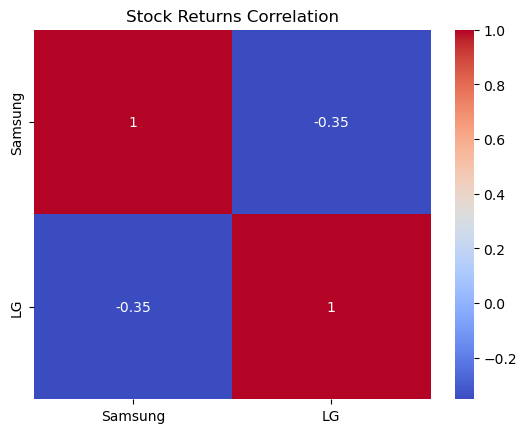

In [4]:
# 히트맵 그리기 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Returns Correlation')
plt.show()